In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
COW = 0
SHEEP = 1
CHICKEN = 2
AIR = 3

classes = ["Cow", "Sheep", "Chicken", "Air"]
colors = ["#FF00EB", "#FF9400", "#00FF14", "#006BFF"]

In [3]:
def build_sensor_data(file_path):
    with open(file_path) as f:
        j = json.load(f)

    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [4]:
sensor_data = {
    "day1": {"s1": None, "s2": None},
    "day2": {"s1": None, "s2": None},
    "day3": {"s1": None, "s2": None}
}

In [5]:
sensor_data["day1"]["s1"] = build_sensor_data("gunler/1/01.bmerawdata")
sensor_data["day1"]["s2"] = build_sensor_data("gunler/1/02.bmerawdata")
sensor_data["day2"]["s1"] = build_sensor_data("gunler/2/01.bmerawdata")
sensor_data["day2"]["s2"] = build_sensor_data("gunler/2/02.bmerawdata")
sensor_data["day3"]["s1"] = build_sensor_data("gunler/3/01.bmerawdata")
sensor_data["day3"]["s2"] = build_sensor_data("gunler/3/02.bmerawdata")

In [6]:
def plot_sensor(group_name, sensors, sensor_idx):
    plt.figure(figsize=(12, 6))
    plt.title(f"{group_name} Sensor {sensor_idx}")
    plt.yscale("log")
    for profile_idx in sensors[sensor_idx]:
        plt.plot(sensors[sensor_idx][profile_idx]["Date"].values,
                 sensors[sensor_idx][profile_idx]["Resistance Gassensor"].values,
                 label=f"S {profile_idx}")
    plt.legend()
    plt.show()

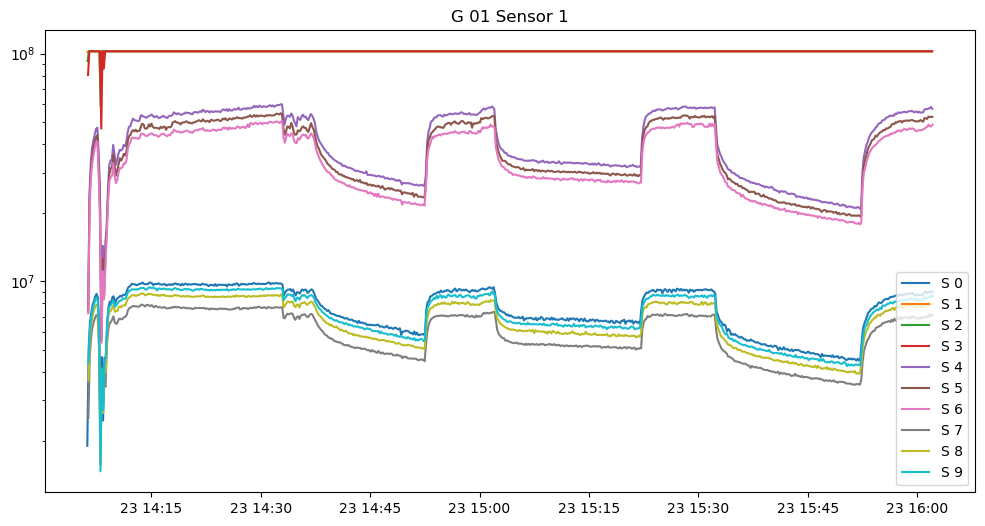

In [7]:
plot_sensor("G 01", sensor_data["day1"]["s1"], 1)

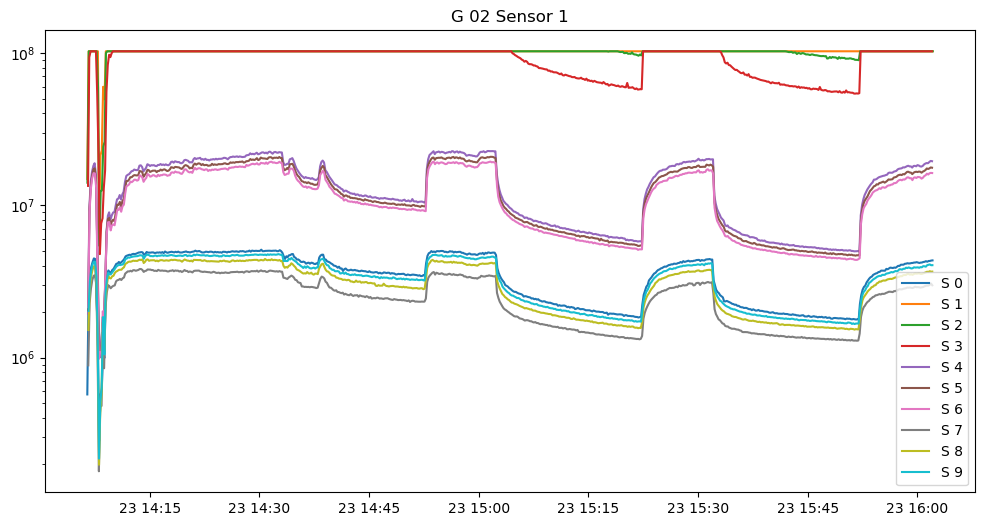

In [8]:
plot_sensor("G 02", sensor_data["day1"]["s2"], 1)

In [9]:
def plot_sensor_it(day, matrix, sensor_idx, sensor_data, labels, classes, colors, save_pdf=False):
    fig = go.Figure()

    sensors = sensor_data[f"day{day}"][f"s{matrix}"]
    for profile_idx in sensors[sensor_idx]:
        fig.add_trace(go.Scatter(x=sensors[sensor_idx][profile_idx]["Date"].values,
                                 y=sensors[sensor_idx][profile_idx]["Resistance Gassensor"].values,
                                 mode="lines",
                                 name=f"Step {profile_idx}"))

    for label in labels[f"day{day}"][f"s{matrix}"]:
        fig.add_vrect(x0=label["start"],
                      x1=label["end"],
                      annotation_text=classes[label["label"]],
                      annotation_position="top left",
                      fillcolor=colors[label["label"]],
                      opacity=0.2,
                      line_width=0)

    title = f"Day {day}, Matrix {matrix}, Sensor {sensor_idx}"
    fig.update_layout(title=title, title_x=0.5, width=1000, height=600)

    fig.update_yaxes(type="log")
    if save_pdf:
        fig.write_image(f"{day}_{matrix}_{sensor_idx}.pdf")
    fig.show()

In [10]:
sensor_labels = {
    "day1": {
        "s1": [
            {
                "start": "2024-09-23 14:38:00",
                "end": "2024-09-23 14:52:00",
                "label": COW
            },
            {
                "start": "2024-09-23 14:54:00",
                "end": "2024-09-23 15:02:00",
                "label": AIR
            },
            {
                "start": "2024-09-23 15:03:00",
                "end": "2024-09-23 15:21:00",
                "label": CHICKEN
            },
            {
                "start": "2024-09-23 15:23:00",
                "end": "2024-09-23 15:32:00",
                "label": AIR
            },
            {
                "start": "2024-09-23 15:34:00",
                "end": "2024-09-23 15:51:00",
                "label": SHEEP
            },
            {
                "start": "2024-09-23 15:54:00",
                "end": "2024-09-23 16:01:00",
                "label": AIR
            }
        ],
        "s2": [
            {
                "start": "2024-09-23 14:40:00",
                "end": "2024-09-23 14:52:00",
                "label": CHICKEN
            },
            {
                "start": "2024-09-23 14:54:00",
                "end": "2024-09-23 15:02:00",
                "label": AIR
            },
            {
                "start": "2024-09-23 15:04:00",
                "end": "2024-09-23 15:21:00",
                "label": SHEEP
            },
            {
                "start": "2024-09-23 15:23:00",
                "end": "2024-09-23 15:32:00",
                "label": AIR
            },
            {
                "start": "2024-09-23 15:34:00",
                "end": "2024-09-23 15:51:00",
                "label": COW
            },
            {
                "start": "2024-09-23 15:54:00",
                "end": "2024-09-23 16:01:00",
                "label": AIR
            }
        ]
    },
    "day2": {
        "s1": [
            {
                "start": "2024-09-24 14:32:00",
                "end": "2024-09-24 14:49:00",
                "label": COW
            },
            {
                "start": "2024-09-24 14:51:00",
                "end": "2024-09-24 14:59:00",
                "label": AIR
            },
            {
                "start": "2024-09-24 15:01:00",
                "end": "2024-09-24 15:19:00",
                "label": CHICKEN
            },
            {
                "start": "2024-09-24 15:22:00",
                "end": "2024-09-24 15:29:00",
                "label": AIR
            },
            {
                "start": "2024-09-24 15:32:00",
                "end": "2024-09-24 15:49:00",
                "label": SHEEP
            },
            {
                "start": "2024-09-24 15:51:00",
                "end": "2024-09-24 15:59:00",
                "label": AIR
            }
        ],
        "s2": [
            {
                "start": "2024-09-24 14:32:00",
                "end": "2024-09-24 14:49:00",
                "label": CHICKEN
            },
            {
                "start": "2024-09-24 14:52:00",
                "end": "2024-09-24 14:59:00",
                "label": AIR
            },
            {
                "start": "2024-09-24 15:02:00",
                "end": "2024-09-24 15:20:00",
                "label": SHEEP
            },
            {
                "start": "2024-09-24 15:22:00",
                "end": "2024-09-24 15:29:00",
                "label": AIR
            },
            {
                "start": "2024-09-24 15:32:00",
                "end": "2024-09-24 15:49:00",
                "label": COW
            },
            {
                "start": "2024-09-24 15:51:00",
                "end": "2024-09-24 16:00:00",
                "label": AIR
            }
        ]
    },
    "day3": {
        "s1": [
            {
                "start": "2024-09-25 14:32:00",
                "end": "2024-09-25 14:50:00",
                "label": COW
            },
            {
                "start": "2024-09-25 14:51:00",
                "end": "2024-09-25 15:00:00",
                "label": AIR
            },
            {
                "start": "2024-09-25 15:02:00",
                "end": "2024-09-25 15:20:00",
                "label": CHICKEN
            },
            {
                "start": "2024-09-25 15:22:00",
                "end": "2024-09-25 15:30:00",
                "label": AIR
            },
            {
                "start": "2024-09-25 15:32:00",
                "end": "2024-09-25 15:50:00",
                "label": SHEEP
            },
            {
                "start": "2024-09-25 15:52:00",
                "end": "2024-09-25 15:59:00",
                "label": AIR
            }
        ],
        "s2": [
            {
                "start": "2024-09-25 14:32:00",
                "end": "2024-09-25 14:50:00",
                "label": CHICKEN
            },
            {
                "start": "2024-09-25 14:52:00",
                "end": "2024-09-25 15:00:00",
                "label": AIR
            },
            {
                "start": "2024-09-25 15:02:00",
                "end": "2024-09-25 15:20:00",
                "label": SHEEP
            },
            {
                "start": "2024-09-25 15:22:00",
                "end": "2024-09-25 15:29:00",
                "label": AIR
            },
            {
                "start": "2024-09-25 15:32:00",
                "end": "2024-09-25 15:50:00",
                "label": COW
            },
            {
                "start": "2024-09-25 15:52:00",
                "end": "2024-09-25 16:00:00",
                "label": AIR
            }
        ]
    }
}

In [11]:
for day in range(1, 4):
    plot_sensor_it(day, 1, 0, sensor_data, sensor_labels, classes, colors)

In [12]:
for day in range(1, 4):
    plot_sensor_it(day, 2, 0, sensor_data, sensor_labels, classes, colors)